In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)



In [3]:
data = pd.read_csv('../data/train/diamonds_train.csv', index_col=[0])
data.head()

,index_id,depth,table,x,y,z,price,carat,cut,color,clarity,city
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,4268,1.21,Premium,J,VS2,Dubai
1,41667f6e2629360aecaf00b20f8732e3310417ebd54b24...,61.6,58.0,6.40,6.35,3.93,3513,1.02,Premium,J,VS2,Dubai
2,01f8667f50d52677bea23231a74156e4f92360d7bc3db6...,62.3,58.0,5.86,5.80,3.63,1792,0.77,Premium,J,VS2,Dubai
3,c3867352aab641358faec75d733af012dbe2259a014ea8...,59.6,60.0,7.58,7.48,4.49,7553,1.51,Premium,J,VS2,Dubai
4,0da4b104c4d8589fcb96a03aa0787549a2631935b0f499...,60.2,62.0,5.40,5.33,3.23,1176,0.57,Premium,J,VS2,Dubai


In [4]:
data.drop(labels=['index_id','city'], axis=1, inplace= True)

In [5]:
target = data ['price']
data.drop(labels='price', axis=1, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   depth    40455 non-null  float64
 1   table    40455 non-null  float64
 2   x        40455 non-null  float64
 3   y        40455 non-null  float64
 4   z        40455 non-null  float64
 5   carat    40455 non-null  float64
 6   cut      40455 non-null  object 
 7   color    40455 non-null  object 
 8   clarity  40455 non-null  object 
dtypes: float64(6), object(3)
memory usage: 3.1+ MB


In [7]:
label_encoder = LabelEncoder()
data.iloc[0:,6] = label_encoder.fit_transform(data.iloc[0:,6]).astype('float64')
data.iloc[0:,7] = label_encoder.fit_transform(data.iloc[0:,7]).astype('float64')
data.iloc[0:,8] = label_encoder.fit_transform(data.iloc[0:,8]).astype('float64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   depth    40455 non-null  float64
 1   table    40455 non-null  float64
 2   x        40455 non-null  float64
 3   y        40455 non-null  float64
 4   z        40455 non-null  float64
 5   carat    40455 non-null  float64
 6   cut      40455 non-null  float64
 7   color    40455 non-null  float64
 8   clarity  40455 non-null  float64
dtypes: float64(9)
memory usage: 3.1 MB


In [8]:
corr = data.corr()
corr.head()

,depth,table,x,y,z,carat,cut,color,clarity
depth,1.000000,-0.293114,-0.026348,-0.030966,0.094655,0.026528,-0.196852,0.047988,-0.058557
table,-0.293114,1.000000,0.196059,0.184673,0.155189,0.183392,0.153463,0.031120,-0.084253
x,-0.026348,0.196059,1.000000,0.973712,0.984876,0.975688,0.026544,0.272498,-0.228392
y,-0.030966,0.184673,0.973712,1.000000,0.964828,0.951667,0.032142,0.265611,-0.219984
z,0.094655,0.155189,0.984876,0.964828,1.000000,0.967570,0.005101,0.275022,-0.230862


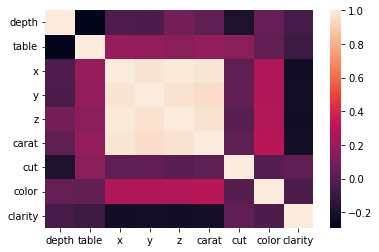

In [9]:
sns.heatmap(corr);

Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [10]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

selected_columns = data.columns[columns]
selected_columns.shape

(6,)

In [15]:
data = data[selected_columns]
data.head()
#Now, the dataset has only those columns with correlation less than 0.9

,depth,table,x,cut,color,clarity
0,62.4,58.0,6.83,3.0,6.0,5.0
1,61.6,58.0,6.40,3.0,6.0,5.0
2,62.3,58.0,5.86,3.0,6.0,5.0
3,59.6,60.0,7.58,3.0,6.0,5.0
4,60.2,62.0,5.40,3.0,6.0,5.0


In [27]:
# Train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (34386, 6), X_test: (6069, 6), y_train: (34386,), y_test: (6069,)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [21]:
pipeline_xgb.fit(X_train, y_train);

In [25]:
y_pred = pipeline_xgb.predict(X_test)
y_pred

array([9157.931  ,  484.45258, 8146.088  , ..., 1359.7922 ,  869.0322 ,
       1628.9905 ], dtype=float32)

In [26]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

631.7223852673435

In [33]:
# Model definition

#model = linear_model.Lasso()
#model = ElasticNet()
#model = Ridge()
#model = SVR()
#model = SGDRegressor()
#model = LinearRegression()
model=RandomForestRegressor()



In [34]:
# Model training
model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
# Model predictions

y_pred = model.predict(X_test)
y_pred

array([8171.29,  494.1 , 8520.67, ..., 1288.76, 1074.37, 1650.1 ])

In [36]:
# Visual check

rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

705.7637128724999

In [41]:
model.fit(X,y) #Volvemos a entrenar el modelo con el datframe original (sin la separacion de train y test), para tener mas datos en el entreno

RandomForestRegressor()

In [42]:
#Model prediction Test Dataframe (aka real prediction):
diamonds_train=pd.read_csv('../data/test/diamonds_test.csv', index_col=[0])
diamonds_train

,carat,cut,color,clarity,depth,table,x,y,z,city
id,,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...
13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv


In [43]:
#We must order the columns as per the train dataframe columns order:
diamonds_train=diamonds_train[['depth', 'table', 'x', 'y', 'z', 'carat', 'cut', 'color',
       'clarity','city']]

In [44]:
diamonds_train_encoded= pd.get_dummies(diamonds_train, 
                                    columns=['cut', 'color','clarity'], 
                                    drop_first=True)
diamonds_train_encoded.drop(labels='city', axis=1, inplace=True)
diamonds_train_encoded

,depth,table,x,y,z,carat,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,62.7,60.0,5.82,5.89,3.67,0.79,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,61.0,57.0,6.81,6.89,4.18,1.20,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,62.2,61.0,7.38,7.32,4.57,1.57,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,63.8,54.0,6.09,6.13,3.90,0.90,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,62.9,58.0,5.05,5.09,3.19,0.50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,61.9,56.0,5.35,5.32,3.30,0.57,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
13481,62.2,55.0,5.71,5.73,3.56,0.71,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
13482,61.6,55.0,5.75,5.71,3.53,0.70,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
y_pred = model.predict(diamonds_train_encoded)
y_pred


array([3072.1 , 5363.89, 9015.22, ..., 2981.2 , 2177.81,  804.17])

In [46]:
y_pred=pd.DataFrame(y_pred, columns=['price'])
y_pred.reset_index(inplace=True)
y_pred.rename(columns={"index": "id"}, inplace= True)
y_pred

,id,price
0,0,3072.10
1,1,5363.89
2,2,9015.22
3,3,4314.79
4,4,1722.08
...,...,...
13480,13480,1910.83
13481,13481,2398.57
13482,13482,2981.20
13483,13483,2177.81


In [47]:
y_pred.to_csv('../data/prediction/price_prediction.csv', index= False)